# HW 10 CLUSTERING BUSINESS

In [338]:
import numpy as np
import pylab as pl
import pandas as pd
import numpy as np
import requests
import zipfile
import StringIO
import os
import geopandas as gp
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
%pylab inline

Populating the interactive namespace from numpy and matplotlib


NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages

In [20]:
dict_data = {}

In [132]:
k = 0
pathstring1 = 'Econ2001_And_Earlier'
for i in range(94, 100):
    pathstring2 = "zbp" + str(i)
    z = zipfile.ZipFile(pathstring2 + 'totals.zip')
    dict_data[k] = pd.read_csv(z.open(pathstring2 + 'totals.zip'.replace('.zip','.txt')))
    dict_data[k] = dict_data[k].rename(columns = {'ZIP':'zip', 'QP1':'qp1', 'EST':'est'})
    dict_data[k] = dict_data[k].rename(columns = {'est':1900+i})
    dict_data[k]['zip'] = dict_data[k]['zip'].astype(int)
    k+=1
for i in range(0, 2): 
    pathstring2 = "zbp0" + str(i)
    z = zipfile.ZipFile(pathstring2 + 'totals.zip')
    dict_data[k] = pd.read_csv(z.open(pathstring2 + 'totals.zip'.replace('.zip','.txt')))
    dict_data[k] = dict_data[k].rename(columns = {'ZIP':'zip', 'QP1':'qp1', 'EST':'est'})
    dict_data[k] = dict_data[k].rename(columns = {'est':2000+i})
    dict_data[k]['zip'] = dict_data[k]['zip'].astype(int)
    k+=1

In [133]:
for i in range(2, 10): 
    pathstring1 = 'econ200' + str(i)
    pathstring2 = "zbp0" + str(i)
    z = zipfile.ZipFile(pathstring2 + 'totals.zip')
    dict_data[k] = pd.read_csv(z.open(pathstring2 + 'totals.zip'.replace('.zip','.txt')))
    dict_data[k] = dict_data[k].rename(columns = {'ZIP':'zip', 'QP1':'qp1', 'EST':'est'})
    dict_data[k] = dict_data[k].rename(columns = {'est':2000+i})
    dict_data[k]['zip'] = dict_data[k]['zip'].astype(int)
    k+=1
for i in range(10, 15): 
    pathstring1 = 'econ20' + str(i)
    pathstring2 = "zbp" + str(i)
    z = zipfile.ZipFile(pathstring2 + 'totals.zip')
    dict_data[k] = pd.read_csv(z.open(pathstring2 + 'totals.zip'.replace('.zip','.txt')))
    dict_data[k] = dict_data[k].rename(columns = {'ZIP':'zip', 'QP1':'qp1', 'EST':'est'})
    dict_data[k] = dict_data[k].rename(columns = {'est':2000+i})
    dict_data[k]['zip'] = dict_data[k]['zip'].astype(int)
    k+=1

In [155]:
data = pd.merge(dict_data[0], dict_data[1], left_on = 'zip', right_on = 'zip', how = 'inner')
for i in range (2, len(dict_data)):
    data = pd.merge(data, dict_data[i], left_on = 'zip', right_on = 'zip', how = 'inner')

In [156]:
data.columns

Index([      u'zip',    u'name_x', u'empflag_x',     u'emp_x',     u'qp1_x',
            u'ap_x',         1994,    u'name_y', u'empflag_y',     u'emp_y',
       ...
        u'emp_nf_y',     u'emp_y',  u'qp1_nf_y',       u'qp1',   u'ap_nf_y',
            u'ap_y',         2014,      u'city',    u'stabbr',  u'cty_name'],
      dtype='object', length=166)

In [161]:
data_cut = data.iloc[:,data.columns<3000]
data_cut['zip'] = data['zip']

/Users/Xianbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [187]:
data_cut.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,zip
0,439,439,433,457,444,469,493,490,490,505,...,509,503,477,458,448,436,453,439,458,1001
1,450,467,487,500,490,558,563,587,566,586,...,582,596,584,571,570,558,572,572,560,1002
2,10,10,13,15,14,13,13,13,15,16,...,12,16,17,16,16,16,15,15,18,1003
3,47,48,47,41,31,35,48,37,23,21,...,30,20,18,18,21,19,16,16,13,1004
4,92,95,101,104,95,82,86,90,94,93,...,98,106,97,87,96,91,94,97,97,1005


In [110]:
ct_shape = gp.GeoDataFrame.from_file('nyc-zip-code-tabulation-areas-polygons.geojson')

In [169]:
ct_shape_cut = ct_shape[['geometry','postalCode']]
ct_shape_cut['postalCode'] = ct_shape_cut['postalCode'].astype(int)

/Users/Xianbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [170]:
ct_shape_all = pd.merge(left = data_cut, right = ct_shape_cut, how = 'inner', left_on = 'zip', right_on = 'postalCode')

In [186]:
ct_shape_all.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,zip,geometry,postalCode
0,6999,7088,7075,7154,7254,7233,7317,7188,7141,7084,...,7472,7305,7241,7227,7235,7273,7369,10001,POLYGON ((-74.00827017711134 40.75258714368449...,10001
1,1784,1819,1919,2049,2003,2085,2277,2543,2269,2402,...,2691,2775,2872,2912,2954,2988,2972,10002,POLYGON ((-73.97441674489379 40.73642441865476...,10002
2,3256,3377,3417,3535,3649,3659,3683,3602,3616,3704,...,4071,4099,4113,4159,4214,4277,4333,10003,POLYGON ((-73.97986374196766 40.73497446573838...,10003
3,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,...,1376,1379,1398,1404,1442,1479,1554,10004,"POLYGON ((-74.00596661578348 40.7043243225291,...",10004
4,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,...,1376,1379,1398,1404,1442,1479,1554,10004,POLYGON ((-74.04166368343016 40.69644987183209...,10004


In [266]:
ct_shape_norm = ct_shape_all.iloc[:,:21].T

In [267]:
ct_shape_norm = (ct_shape_norm - ct_shape_norm.mean())/ct_shape_norm.std()

In [268]:
ct_shape_norm = ct_shape_norm.T

In [269]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

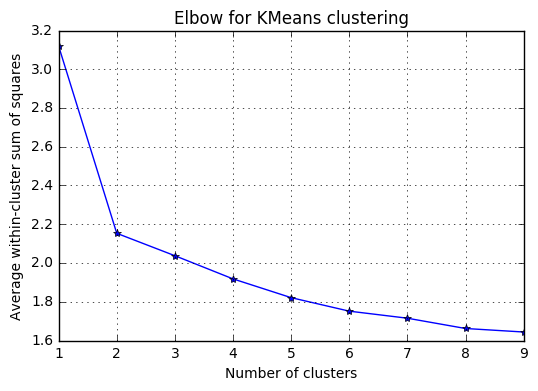

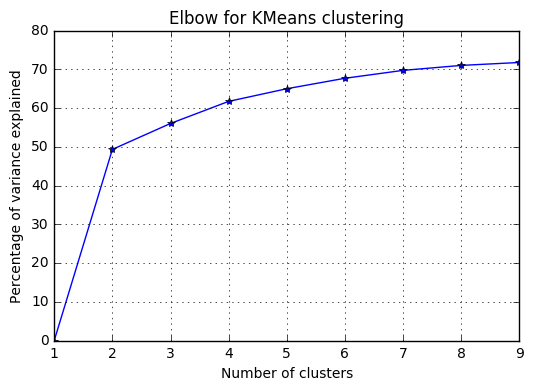

In [270]:
elbow(ct_shape_norm, range(1,10))

In [271]:
X=ct_shape_norm.iloc[:,:21]
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.572142801775
For n_clusters =3, the average silhouette_score is :0.537793455724
For n_clusters =4, the average silhouette_score is :0.495601550461
For n_clusters =5, the average silhouette_score is :0.266002905976
For n_clusters =6, the average silhouette_score is :0.27472579015


In [272]:
n = 2
km = KMeans(n_clusters = n, random_state = 200)
km_label = km.fit_predict(ct_shape_norm)

In [295]:
x = arange(1994,2015)

In [297]:
km.cluster_centers_.T[:,1]

array([ 0.20536521,  0.35562765,  0.40103394,  0.46460279,  0.56792786,
        0.63601044,  0.82662395,  0.70481935,  0.17792653,  0.0939102 ,
        0.29977344,  0.08558024, -0.02091628, -0.2309396 , -0.43388129,
       -0.55162003, -0.68464466, -0.87302453, -0.75031632, -0.65881181,
       -0.61504706])

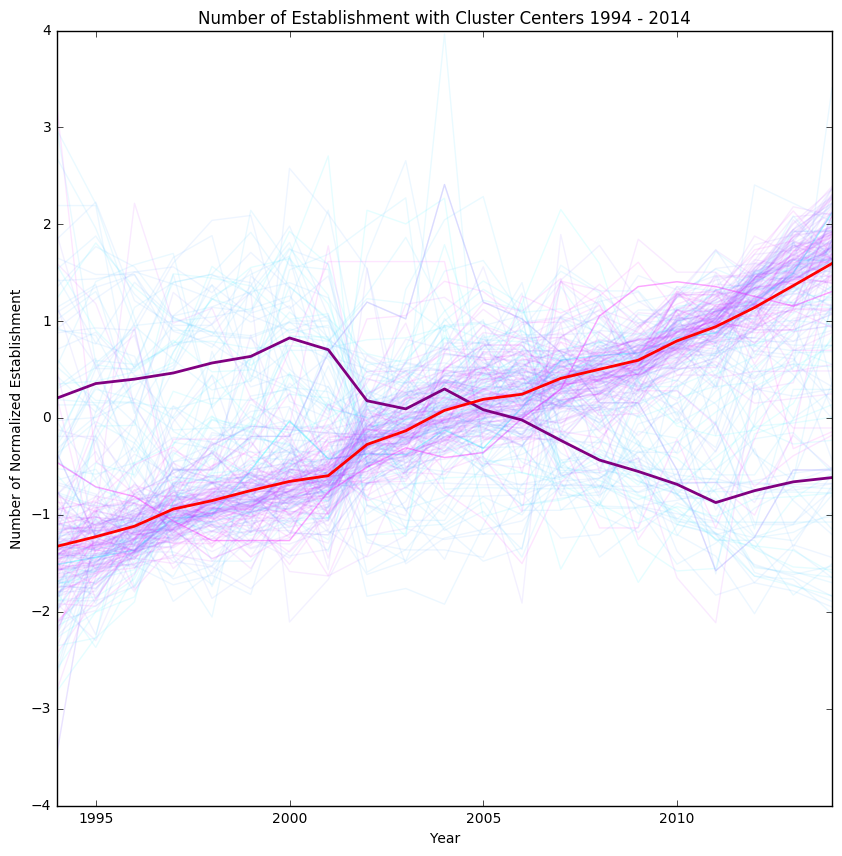

In [301]:
fig, ax = plt.subplots(figsize=(10,10))
ct_shape_norm.T.plot(ax=ax, legend = 0, c = km_label, cmap=plt.cm.cool, alpha=0.1)
ax.plot(x,km.cluster_centers_.T[:,1], lw = 2, color = 'purple')
ax.plot(x,km.cluster_centers_.T[:,0], lw = 2, color = 'red')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Normalized Establishment')
ax.set_title('Number of Establishment with Cluster Centers 1994 - 2014')

In [309]:
ct_shape_norm_new = ct_shape_norm.copy()
ct_shape_norm_new['cluster'] = km.fit_predict(ct_shape_norm)

In [311]:
ct_shape_norm_new['geometry'] = ct_shape_all['geometry']

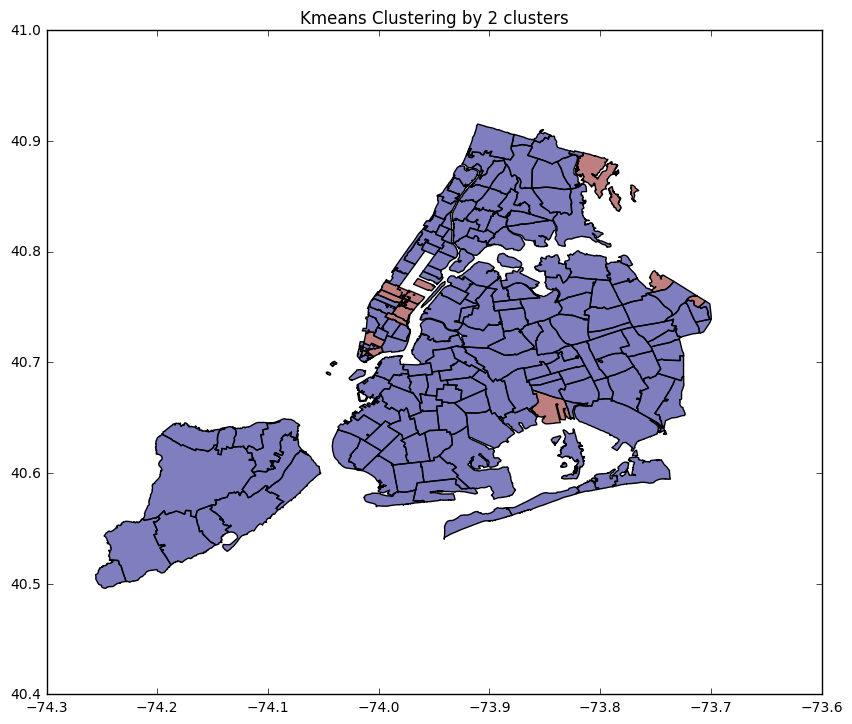

In [337]:
gp.GeoDataFrame(ct_shape_norm_new).plot(column = 'cluster', figsize=(10,10))
title('Kmeans Clustering by 2 clusters')

In [344]:
gm = GMM(n_components=2, random_state = 200)
gmfit = gm.fit(ct_shape_norm)

/Users/Xianbo/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Xianbo/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Xianbo/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Xianbo/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: 

In [345]:
ct_shape_norm_new2 = ct_shape_norm.copy()
ct_shape_norm_new2['cluster'] = gmfit.predict(ct_shape_norm)

/Users/Xianbo/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [346]:
ct_shape_norm_new2['geometry'] = ct_shape_all['geometry']

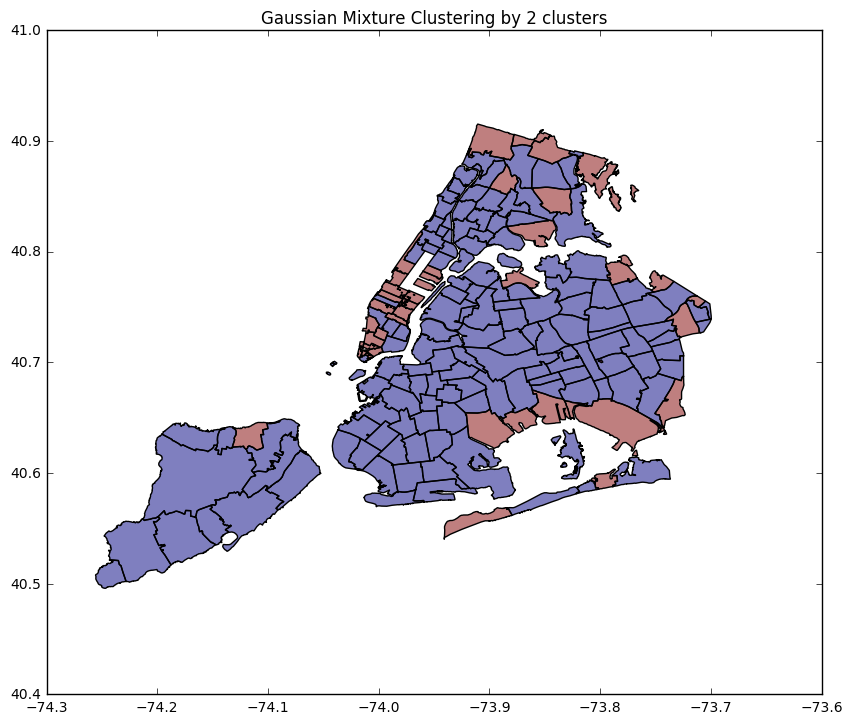

In [348]:
gp.GeoDataFrame(ct_shape_norm_new2).plot(column = 'cluster', figsize=(10,10))
title('Gaussian Mixture Clustering by 2 clusters')